# Quality Assessment
Now it's your turn. Follow [the steps on the platform](https://platform.wbscodingschool.com/courses/data-science/9474/) and use what you've learnt to see how reliable the data is.

In [ ]:
import pandas as pd
import numpy as np

Load our cleaned DataFrames

In [ ]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

## orderitems_complete
# url = "https://drive.google.com/file/d/1pmJBIkyfSMOfZjd3cpxW0xZbn-cQ19TO/view?usp=share_link"
# path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
# orderlines_cl = pd.read_csv(path)
# orderlines_cl['date'] = pd.to_datetime(orderlines_cl['date'])

## 1.&nbsp; Define Pandas display format

In [ ]:
# your code here
pd.set_option("display.precision", 2)       # show only 2 numbers behind the decimal seperator
pd.set_option("expand_frame_repr", False)   # Don#t hide columns
pd.set_option("display.max_rows", 50)      #definde max rows shown (999)

## 2.&nbsp; Exclude unwanted orders

### Excluded Orders with unwanted states

In [ ]:
# your code here
orders_cl['state'].unique()

array(['Cancelled', 'Completed', 'Pending', 'Shopping Basket',
       'Place Order'], dtype=object)

In [ ]:
orders_cl = orders_cl.loc[orders_cl['state'].isin(['Completed'])]

### Getting Rid of Orderlines- & Orders-Entry, that are not represented in each other

#### Define Sets for the filtering

In [ ]:
## Orderlines
ol_id = set(orderlines_cl['id_order'])

In [ ]:
## Orders
o_id = set(orders_cl['order_id'])

#### Use Filters

##### Orderlines

In [ ]:
orderlines_cl = orderlines_cl.loc[orderlines_cl['id_order'].isin(o_id)]

##### Orders

In [ ]:
orders_cl = orders_cl.loc[orders_cl['order_id'].isin(ol_id)]

## 3.&nbsp; Exclude orders with unknown products


#### Define Sets for the filtering

In [ ]:
# your code here
p_sku = set(products_cl['sku'])
prefiltered = orderlines_cl.loc[~(orderlines_cl['sku'].isin(p_sku))].copy()
ol_kick = set(prefiltered['id_order'])
filter_me = orders_cl['order_id'].isin(ol_kick)

In [ ]:
orders_cl = orders_cl.loc[~filter_me]

#### Define Sets for the filtering

In [ ]:
## Orderlines
ol_id = set(orderlines_cl['id_order'])

In [ ]:
## Orders
o_id = set(orders_cl['order_id'])

#### Use Filters

##### Orderlines

In [ ]:
orderlines_cl = orderlines_cl.loc[orderlines_cl['id_order'].isin(o_id)]

##### Orders

In [ ]:
orders_cl = orders_cl.loc[orders_cl['order_id'].isin(ol_id)]

In [ ]:
orders_cl

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


## 4.&nbsp; Explore the revenue from different tables

#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [ ]:
# your code here
orderlines_cl['unit_price_total'] = orderlines_cl['unit_price'] * orderlines_cl['product_quantity']

#### Step 2:
Group by `order_id`, summarising by the sum of `unit_price_total`

In [ ]:
# your code here
ol_tp = orderlines_cl.groupby(['id_order']).agg({'unit_price_total': 'sum'})
ol_tp

,unit_price_total
id_order,
241423,129.16
242832,10.77
243330,77.99
245275,149.00
245595,105.98
...,...
527042,13.99
527070,19.98
527074,19.98


### What is the average difference between `total_paid` and `unit_price_total`?

In [ ]:
# your code here
mama_merge = orders_cl.merge(ol_tp, left_on='order_id', right_on='id_order')
mama_merge['price_dif'] = mama_merge['total_paid'] - mama_merge['unit_price_total']

### What is the distribution of these differences?

In [ ]:
# your code here
desc=mama_merge['price_dif'].describe()
desc

count    41701.00
mean         4.47
std         26.05
min       -165.00
25%          0.00
50%          4.99
75%          6.99
max       3984.99
Name: price_dif, dtype: float64

### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?

In [ ]:
# your explanation here
# There are no negative shipping cost. So I would guess they used coupons or gift-cards and also shipping costs

### If there are differences that you can’t explain: what should you do with these orders?

In [ ]:
# your code here

In [ ]:
IQR = desc['75%']-desc['25%']
max = desc['75%'] + 1.5*IQR
min = desc['25%'] - 1.5*IQR

In [ ]:
keep = set(mama_merge[(mama_merge['price_dif']>= min) & (mama_merge['price_dif']<=max)]['order_id'])
mama = mama_merge.loc[mama_merge['order_id'].isin(keep)].copy()

In [ ]:
mama['price_dif'].describe()

count    40985.00
mean         3.94
std          2.83
min         -5.00
25%          0.00
50%          4.99
75%          6.99
max         16.97
Name: price_dif, dtype: float64

In [ ]:
mama

,order_id,created_date,total_paid,state,unit_price_total,price_dif
0,241423,2017-11-06 13:10:02,136.15,Completed,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,105.98,6.99
...,...,...,...,...,...,...
41696,527042,2018-03-14 11:47:50,18.98,Completed,13.99,4.99
41697,527070,2018-03-14 11:50:48,24.97,Completed,19.98,4.99
41698,527074,2018-03-14 11:51:42,24.97,Completed,19.98,4.99
41699,527096,2018-03-14 11:58:40,34.96,Completed,29.97,4.99


In [ ]:
orders_cl

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


In [ ]:
orderlines_cl = orderlines_cl.loc[orderlines_cl['id_order'].isin(keep)]
orders_cl = mama.copy()

In [ ]:
orders_cl

,order_id,created_date,total_paid,state,unit_price_total,price_dif
0,241423,2017-11-06 13:10:02,136.15,Completed,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,105.98,6.99
...,...,...,...,...,...,...
41696,527042,2018-03-14 11:47:50,18.98,Completed,13.99,4.99
41697,527070,2018-03-14 11:50:48,24.97,Completed,19.98,4.99
41698,527074,2018-03-14 11:51:42,24.97,Completed,19.98,4.99
41699,527096,2018-03-14 11:58:40,34.96,Completed,29.97,4.99


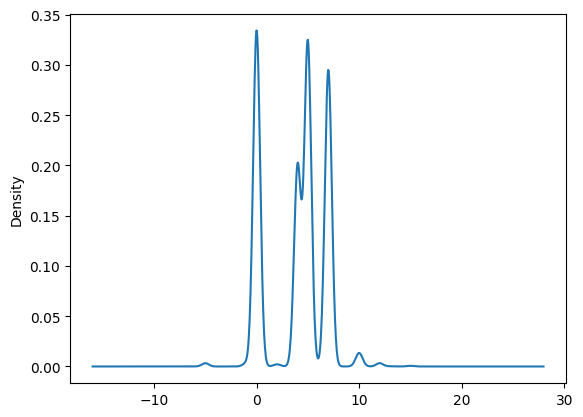

In [ ]:
orders_cl["price_dif"].plot(kind='kde');

### Add Additional Columns To Orderlines

#### Merging with products and Brands

In [ ]:
orderlines_merge = orderlines_cl.merge(products_cl, 'left', on='sku')

In [ ]:
## Adding Column Discount (in %)
orderlines_merge['discount']=((orderlines_merge['price']-orderlines_merge['unit_price'])/orderlines_merge['price'])*100
orderlines_merge.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,in_stock,type,discount
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,22.13
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,17.25
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,18.89


In [ ]:
## Adding brand_id Column
orderlines_merge['brand_id']=orderlines_merge['sku'].str[:3]
orderlines_merge['brand_id'] = orderlines_merge['brand_id'].str.upper()
orderlines_merge.head(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,in_stock,type,discount,brand_id
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,22.13,OWC


In [ ]:
## Merging with brands table
brands = pd.read_csv('https://raw.githubusercontent.com/Loy-Boy/Data_to_use/main/brands.csv')
brands['short'] = brands['short'].str.upper()
orderlines_complete = orderlines_merge.merge(brands, 'left', left_on='brand_id', right_on='short')

In [ ]:
orderlines_complete.head(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,in_stock,type,discount,brand_id,short,long
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,22.13,OWC,OWC,OWC


In [ ]:
orderlines_complete.drop(columns='short',inplace=True)
orderlines_complete.rename(columns={"long": "brand_name"}, inplace=True)
orderlines_complete.head(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,in_stock,type,discount,brand_id,brand_name
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,22.13,OWC,OWC


In [ ]:
orderlines_complete.drop(columns='product_id',inplace=True)
orderlines_complete.rename(columns={"price": "full_price"}, inplace=True)

In [ ]:
orderlines_complete.head(1)

,id,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,full_price,in_stock,type,discount,brand_id,brand_name
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,22.13,OWC,OWC


#### Adding Columns regarding Investment

In [ ]:
orderlines_complete['investment'] = orderlines_complete['full_price'] - orderlines_complete['unit_price']
orderlines_complete['investment_total'] = orderlines_complete['investment'] * orderlines_complete['product_quantity']

In [ ]:
orderlines_complete.nlargest(n=2, columns = 'product_quantity')

,id,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,full_price,in_stock,type,discount,brand_id,brand_name,investment,investment_total
32021,1436657,438871,72,SAN0186,8.65,2017-11-24 12:44:49,622.8,SanDisk Ultra 16GB microSDHC Memory Card A1,Micro Memory Card with Adapter reading speed 9...,9.99,1,57445397,13.41,SAN,SanDisk,1.34,96.48
46088,1573834,495987,50,STA0016,9.99,2018-01-22 12:16:31,499.5,Startech Mini DisplayPort to DisplayPort Cable...,Adapdator Cable Mini Display Port Male to Disp...,12.99,0,1325,23.09,STA,Startech,3.00,150.00


In [ ]:
print('Customers paid more: ' + str((orderlines_complete['discount'] <0).sum()))
print('Customers paid normal or got Discount: ' + str((~(orderlines_complete['discount'] <0)).sum()))
orderlines_complete = orderlines_complete.loc[~(orderlines_complete['discount'] <0)]      ## Ask Hendrik later

Customers paid more: 1571
Customers paid normal or got Discount: 51660


In [ ]:
orderlines_complete['plot_discount'] = orderlines_complete['discount'].apply(np.ceil)
orderlines_complete['clean_income'] = orderlines_complete['unit_price_total'] - orderlines_complete['investment_total']

### Maybe a pretty Plot

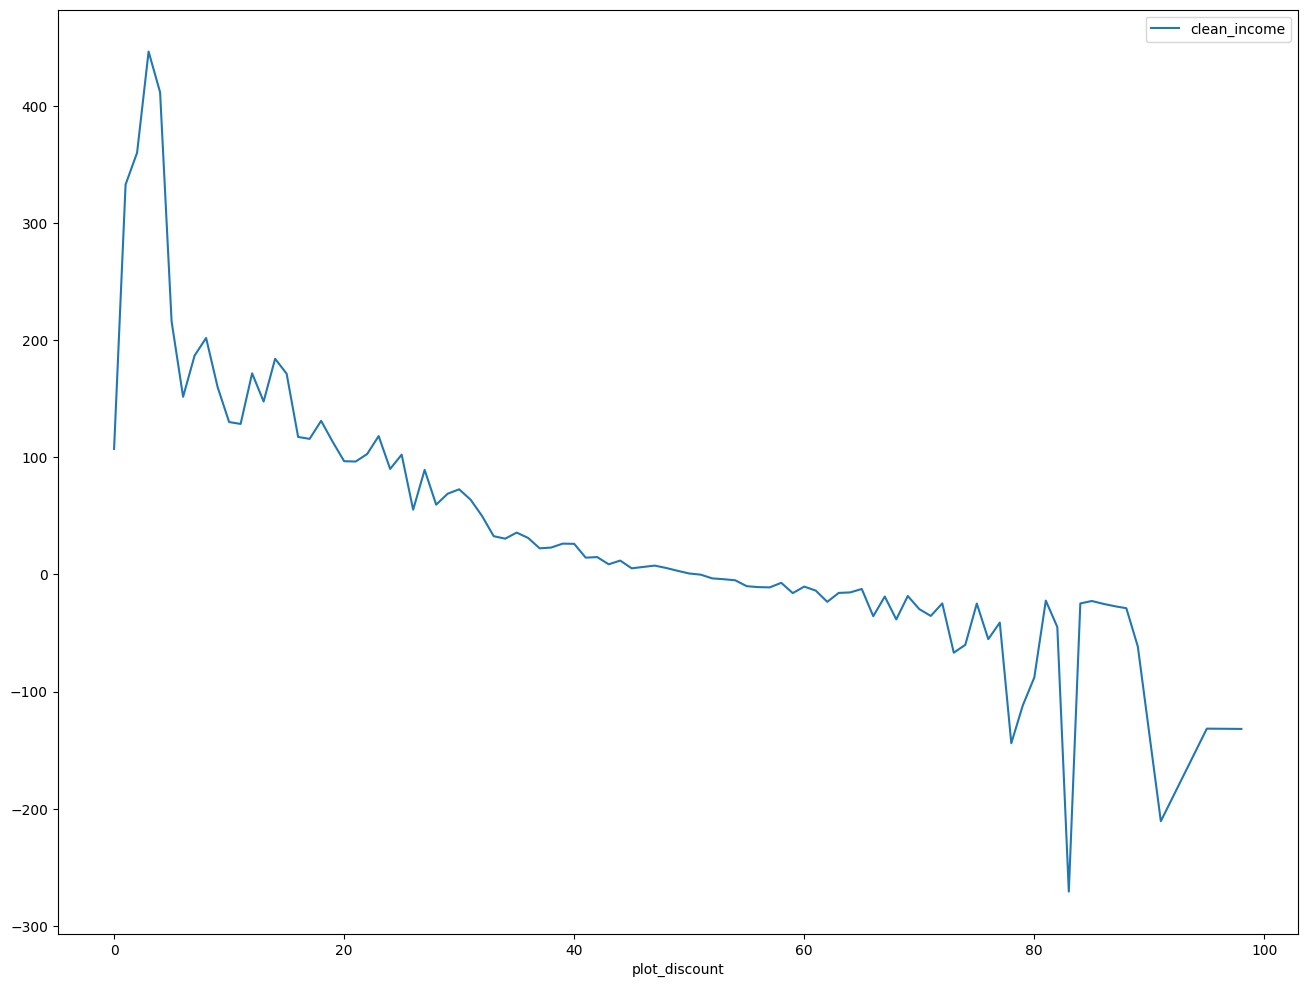

In [ ]:
(
    orderlines_complete.groupby('plot_discount')
    .agg({"clean_income": "mean"})
    .plot(figsize=(16, 12))
);

## 5.&nbsp; Become confident about your dataset

Let's hear your thoughts about what you discovered.

In [ ]:
# your thoughts & code here
orderlines_complete.describe()

,id,id_order,product_quantity,unit_price,unit_price_total,full_price,in_stock,discount,investment,investment_total,plot_discount,clean_income
count,5.17e+04,51660.00,51660.00,51660.00,51660.00,51660.00,51660.00,51660.00,51660.00,51660.00,51660.00,51660.00
mean,1.39e+06,415090.97,1.13,133.60,144.86,161.04,0.58,22.22,27.44,30.09,22.77,114.78
std,1.51e+05,65459.12,0.81,177.61,206.30,201.60,0.49,17.60,45.18,53.15,17.67,186.45
min,1.12e+06,241423.00,1.00,1.99,1.99,2.99,0.00,0.00,0.00,0.00,0.00,-1920.32
25%,1.27e+06,364139.00,1.00,26.99,29.74,37.99,0.00,10.00,6.00,6.71,11.00,15.76
50%,1.39e+06,418446.50,1.00,64.39,68.99,87.98,1.00,18.33,15.01,16.01,19.00,49.99
75%,1.51e+06,470493.50,1.00,154.00,164.58,179.99,1.00,29.17,32.22,35.00,30.00,132.98
max,1.65e+06,527112.00,72.00,999.99,6876.80,1799.00,1.00,97.14,1320.00,2880.00,98.00,6491.76


## Download your quality controlled DataFrames

In [ ]:
from google.colab import files

orders_cl.to_csv("orders_clean.csv", encoding = 'utf-8-sig')
files.download("orders_clean.csv")

from google.colab import files
orderlines_complete.to_csv('orderlines_complete.csv', encoding = 'utf-8-sig')
files.download('orderlines_complete.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Analysis Buisness Questions

##### What is the time period that the dataset covers?

In [ ]:
orderlines_complete['date'] = pd.to_datetime(orderlines_complete['date'])

In [ ]:
orderlines_complete['date'].min()

Timestamp('2017-01-01 01:46:16')

In [ ]:
orderlines_complete['date'].max()

Timestamp('2018-03-14 11:58:13')

In [ ]:
orderlines_complete['date'].max() - orderlines_complete['date'].min()

Timedelta('437 days 10:11:57')

##### What is the overall revenue for that time?

In [ ]:
orders_cl['unit_price_total'].sum()

7817204.399999999

##### Are there seasonal patterns in the evolution of sales?

In [ ]:
orders_cl["created_date"] = pd.to_datetime(orders_cl["created_date"])
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40985 entries, 0 to 41700
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          40985 non-null  int64         
 1   created_date      40985 non-null  datetime64[ns]
 2   total_paid        40985 non-null  float64       
 3   state             40985 non-null  object        
 4   unit_price_total  40985 non-null  float64       
 5   price_dif         40985 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 2.2+ MB


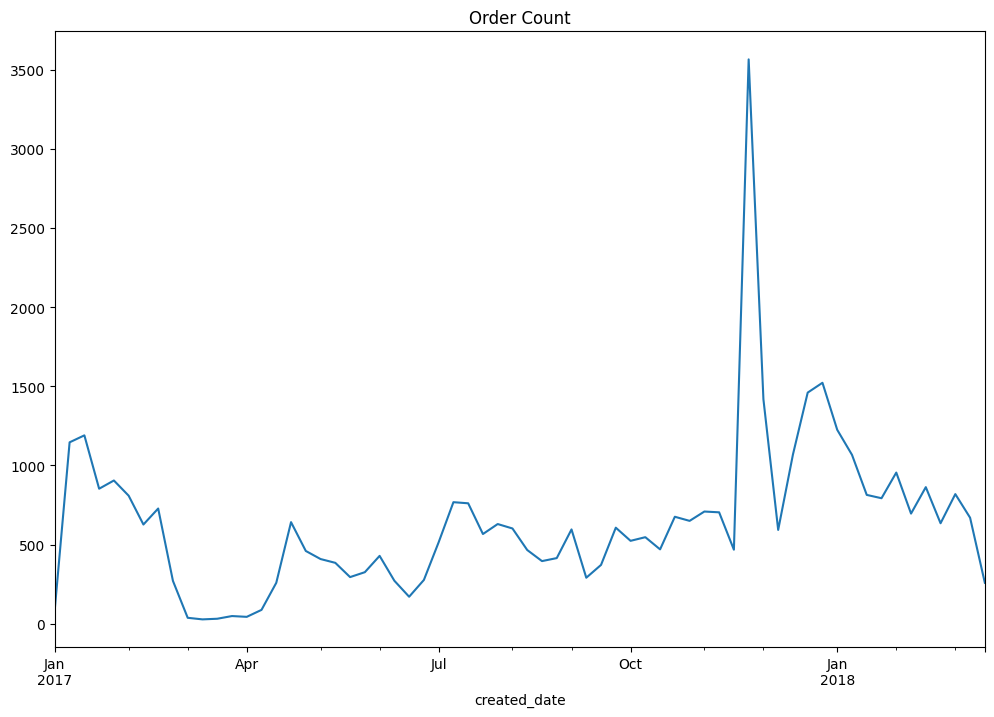

In [ ]:
(
    orders_cl
    .resample("W", on="created_date")
    .count()["order_id"]
    .plot(figsize=(12, 8),title="Order Count")
);

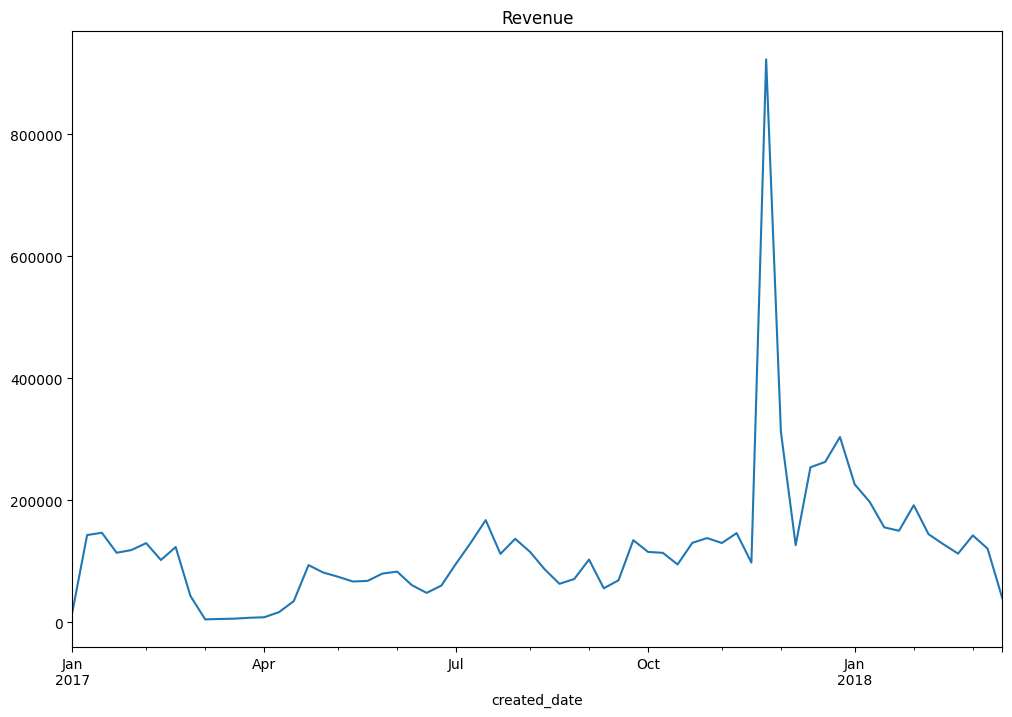

In [ ]:
(
  orders_cl
  .resample("W", on="created_date")
  .sum()["unit_price_total"]
  .plot(figsize=(12, 8),title="Revenue")
);

In [ ]:
orderlines_complete.head(0)

,id,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,full_price,in_stock,type,discount,brand_id,brand_name,investment,investment_total,plot_discount,clean_income


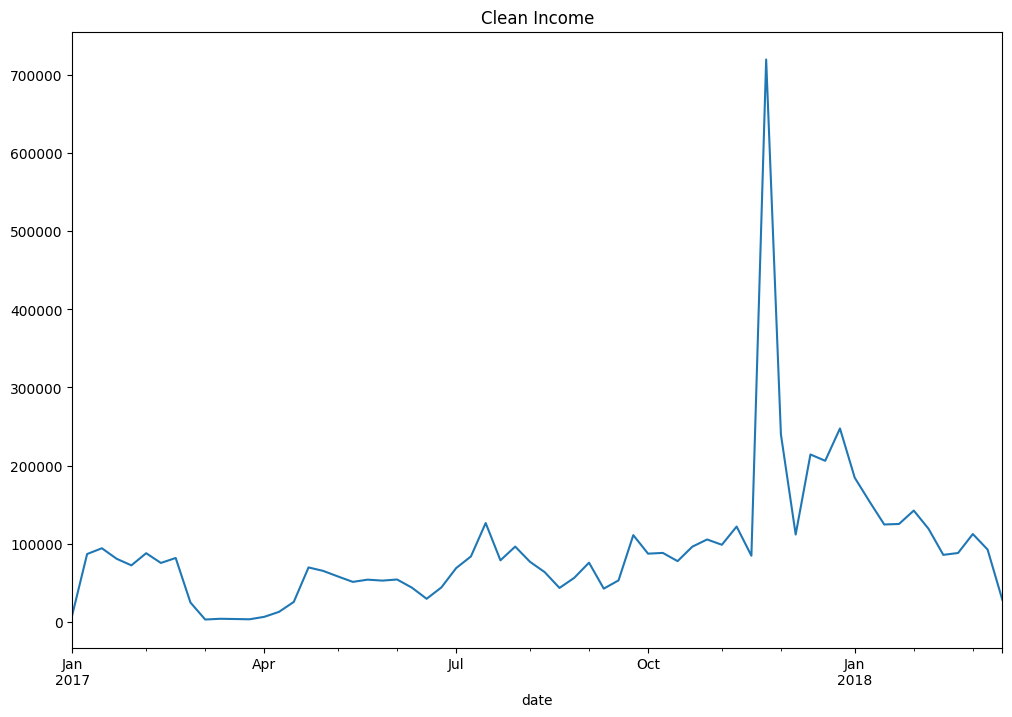

In [ ]:
(
  orderlines_complete
  .resample("W", on="date")
  .sum()["clean_income"]
  .plot(figsize=(12, 8),title="Clean Income")
);

#### What are the most sold products?

In [ ]:
orderlines_complete.head(0)

,id,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,full_price,in_stock,type,discount,brand_id,brand_name,investment,investment_total,plot_discount,clean_income


In [ ]:
orderlines_complete.groupby(['name']).agg({'product_quantity': 'sum','clean_income': 'sum'}).sort_values(by= 'product_quantity', ascending=False).head()

,product_quantity,clean_income
name,,
IPhone AppleCare Protection Plan,955,37059.94
Apple Lightning Cable Connector to USB 1m White (OEM),820,-4136.32
AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,537,76823.52
EarPods Apple Headphones with Remote and Mic (OEM),489,-409.32
"Red 4TB WD 35 ""Mac PC hard drive and NAS",476,50735.92


In [ ]:
import seaborn as sns
import warnings

In [ ]:
# What are the most sold products? PRESI

top_5_df= orderlines_complete.groupby(['name']).agg({'product_quantity': 'sum','clean_income': 'sum'}).sort_values(by= 'product_quantity', ascending=False).head()
top_5_df


,product_quantity,clean_income
name,,
IPhone AppleCare Protection Plan,955,37059.94
Apple Lightning Cable Connector to USB 1m White (OEM),820,-4136.32
AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,537,76823.52
EarPods Apple Headphones with Remote and Mic (OEM),489,-409.32
"Red 4TB WD 35 ""Mac PC hard drive and NAS",476,50735.92


In [ ]:
sns.displot(data= top_5_df,
                  x= "product_quantity",
                  y= "name",
                  kind= "hist",
                  height=10)

#### What are the products that generate the most revenue?

In [ ]:
orderlines_complete.groupby(['name']).agg({'product_quantity': 'sum','clean_income': 'sum'}).sort_values(by= 'clean_income', ascending=False).head()

,product_quantity,clean_income
name,,
"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",236,125787.72
Apple iPhone 6 32GB Space Gray,270,87802.18
Apple iPhone 64GB Space Gray 8,108,83231.86
AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,537,76823.52
Apple iPhone 8 Plus 64GB Gold,79,68842.58


In [ ]:
orderlines_complete.groupby(['name']).agg({'product_quantity': 'sum','clean_income': 'sum', 'unit_price_total': 'sum'}).sort_values(by= 'unit_price_total', ascending=False).head()

,product_quantity,clean_income,unit_price_total
name,,,
"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",236,125787.72,133575.86
Apple iPhone 6 32GB Space Gray,270,87802.18,104560.64
AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,537,76823.52,86473.26
Apple iPhone 64GB Space Gray 8,108,83231.86,85301.93
Apple iPhone 32GB Space Gray,223,67994.52,80715.76


# How big are the offered discounts as a percentage of the product prices?

In [ ]:
orderlines_complete.head(1)


,id,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,full_price,in_stock,type,discount,brand_id,brand_name,investment,investment_total,plot_discount,clean_income
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,22.13,OWC,OWC,13.5,13.5,23.0,33.99


In [ ]:
# make a copy of orderlines_complete

orderlines_discount= orderlines_complete.copy()

In [ ]:
# select only required columns
orderlines_discount = orderlines_discount[['brand_name', 'sku', 'full_price', 'investment', 'discount']]
orderlines_discount.head(3)

,brand_name,sku,full_price,investment,discount
0,OWC,OWC0100,60.99,13.50,22.13
1,iOttie,IOT0014,22.95,3.96,17.25
2,Apple,APP0700,89.00,16.81,18.89


In [ ]:
# let's check the highest discounts:

orderlines_discount.sort_values(by= 'discount', ascending= False)

# why do we have discounts > 90%

,brand_name,sku,full_price,investment,discount
50121,Mophie,MOP0109,69.95,67.95,97.14
49998,Mophie,MOP0105,89.95,84.96,94.45
49959,Mophie,MOP0106,89.95,84.96,94.45
49987,Mophie,MOP0106,89.95,84.96,94.45
49988,Mophie,MOP0107,69.95,65.96,94.30
...,...,...,...,...,...
13167,Apple,APP1194,35.00,0.00,0.00
6717,Apple,APP1685,9.00,0.00,0.00
51476,Matias,MAT0010,69.99,0.00,0.00
49550,iFixit,IFX0053,45.99,0.00,0.00


In [ ]:
# How many products are being discounted? PRESI

orderlines_discount.loc[orderlines_discount['investment'] > 0, 'investment'] # Length: 49404 --> 49404 is the number of products being discounted


0         13.50
1          3.96
2         16.81
3         16.09
4        157.50
          ...  
53226     15.01
53227     15.01
53228     15.01
53229     15.01
53230     15.01
Name: investment, Length: 49404, dtype: float64

In [ ]:
# Data Visualization with seaborn

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Let's make some plots:

# Graphic 1:

sns.relplot(data=orderlines_discount,
           x= "full_price",
           y= "discount",
           height=10,
           aspect=1.5,
           color="g");

In [ ]:
# Graphic 2:

sns.displot(data=orderlines_discount,
            x= "full_price",
            y= 'investment',
            height=10,
            aspect=1.5,
            palette="bright",
            color="seagreen",
            stat="percent");



# Price categories

In [ ]:
orderlines_discount.head(2)

,brand_name,sku,full_price,investment,discount
0,OWC,OWC0100,60.99,13.50,22.13
1,iOttie,IOT0014,22.95,3.96,17.25


In [ ]:
from numpy.core.fromnumeric import mean
# 'full_price' Distribution

desc = orderlines_discount['full_price'].describe()

desc


count    51660.00
mean       161.04
std        201.60
min          2.99
25%         37.99
50%         87.98
75%        179.99
max       1799.00
Name: full_price, dtype: float64

In [ ]:
# add a new column for 'Price_Category'

#Step 1
orderlines_discount['Price_Category']= ''
orderlines_discount.head()

,brand_name,sku,full_price,investment,discount,Price_Category
0,OWC,OWC0100,60.99,13.50,22.13,
1,iOttie,IOT0014,22.95,3.96,17.25,
2,Apple,APP0700,89.00,16.81,18.89,
3,Crucial,CRU0039-A,76.99,16.09,20.90,
4,Pebble,PEB0015,299.99,157.50,52.50,


In [ ]:
# Step 2:

orderlines_discount.loc[orderlines_discount['full_price'] <= desc['25%'], 'Price_Category'] = 'low'
orderlines_discount.loc[orderlines_discount['full_price'] >= desc['75%'], 'Price_Category'] = 'high'
orderlines_discount.loc[orderlines_discount['full_price'].between(desc['25%'], desc['mean']), 'Price_Category'] = 'medium_low'
orderlines_discount.loc[orderlines_discount['full_price'].between(desc['mean'], desc['75%']), 'Price_Category'] = 'medium_high'


In [ ]:
orderlines_discount.head()

,brand_name,sku,full_price,investment,discount,Price_Category
0,OWC,OWC0100,60.99,13.50,22.13,medium_low
1,iOttie,IOT0014,22.95,3.96,17.25,low
2,Apple,APP0700,89.00,16.81,18.89,medium_low
3,Crucial,CRU0039-A,76.99,16.09,20.90,medium_low
4,Pebble,PEB0015,299.99,157.50,52.50,high


In [ ]:
# relation: date/discount VS date/sales

orderlines_complete.head(1)

,id,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,full_price,in_stock,type,discount,brand_id,brand_name,investment,investment_total,plot_discount,clean_income
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,22.13,OWC,OWC,13.5,13.5,23.0,33.99


In [ ]:
orderlines_discount.head(1)

,brand_name,sku,full_price,investment,discount,Price_Category
0,OWC,OWC0100,60.99,13.5,22.13,medium_low


In [ ]:
# date/discount

(
    orderlines_complete
    .resample("M", on="date")
    .mean()["discount"]
    .plot(figsize=(12, 8),title="Discount variation")
);

In [ ]:
# date/sales

orderlines_complete.resample("M", on="date").mean()["clean_income"].plot(figsize=(12, 8),title="income variation");

In [ ]:
orderlines_discount.head()

,brand_name,sku,full_price,investment,discount,Price_Category
0,OWC,OWC0100,60.99,13.50,22.13,medium_low
1,iOttie,IOT0014,22.95,3.96,17.25,low
2,Apple,APP0700,89.00,16.81,18.89,medium_low
3,Crucial,CRU0039-A,76.99,16.09,20.90,medium_low
4,Pebble,PEB0015,299.99,157.50,52.50,high


In [ ]:
orderlines_discount.groupby(by='Price_Category').agg({'investment': 'sum', 'discount': 'mean'}).sort_values(by= 'investment', ascending= False)


,investment,discount
Price_Category,,
high,798491.90,15.04
medium_low,442082.16,23.12
low,92928.66,28.39
medium_high,83880.12,17.85


In [ ]:
# relation between price category and investment

sns.catplot (kind="bar",
            data= orderlines_discount,
            x= "Price_Category",
            y= "investment",
            height=8,
            palette="Blues_r",
            aspect=2).set(title='relation between price categories and the value of discounts');

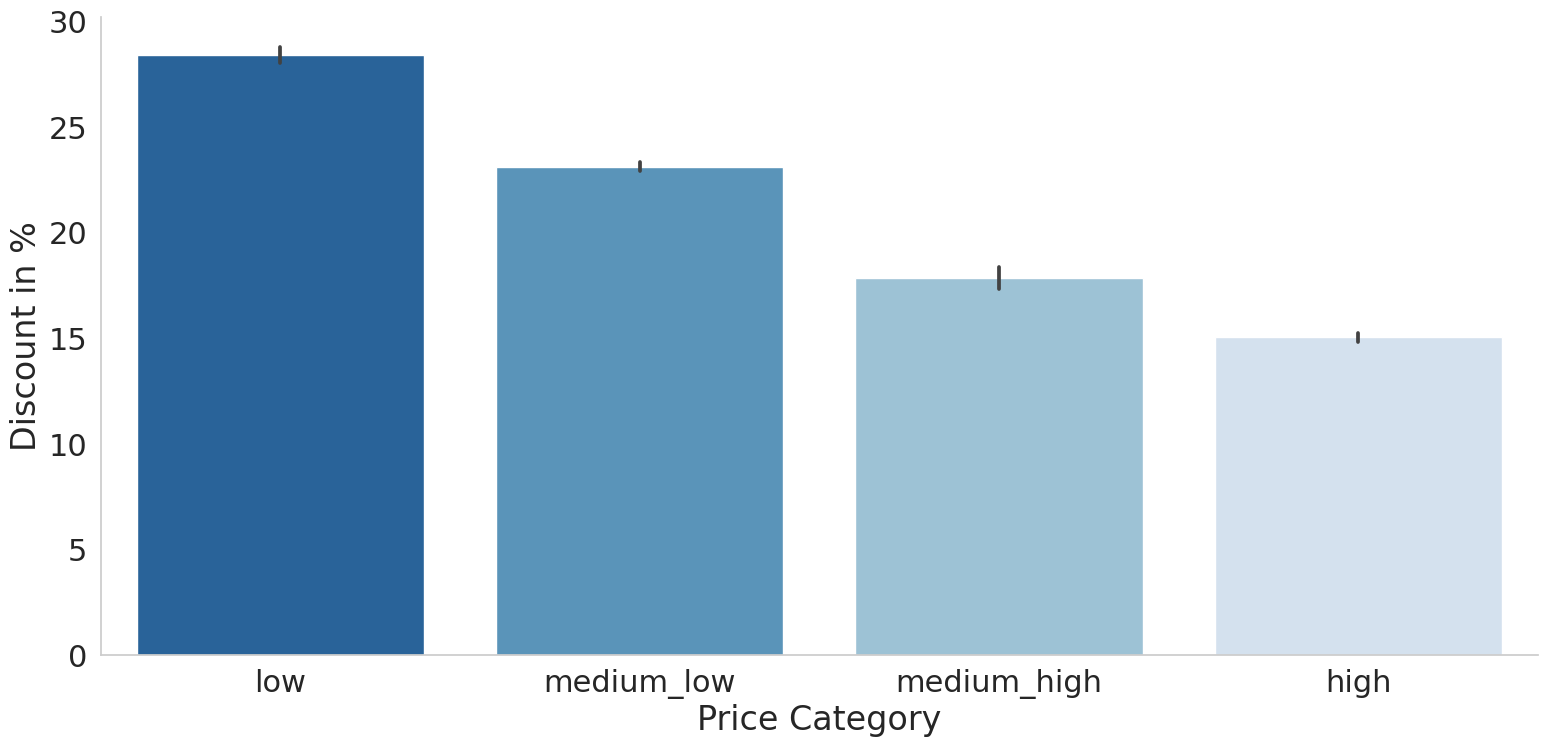

In [ ]:
# relation between price category and discounts
sns.set_theme(font_scale=2)
sns.set_style("whitegrid", {'axes.grid' : False})


g= sns.catplot(kind="bar",
            data=orderlines_discount,
            x="Price_Category",
            y="discount",
            height=8,
            palette="Blues_r",
            order=['low', 'medium_low', 'medium_high', 'high'],
            aspect=2);

(g.set_axis_labels('Price Category',"Discount in %" ))

In [ ]:
orderlines_complete.head(1)

,id,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,full_price,in_stock,type,discount,brand_id,brand_name,investment,investment_total,plot_discount,clean_income
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,22.13,OWC,OWC,13.5,13.5,23.0,33.99


In [ ]:
# relation between revenue and discount rates in one plot

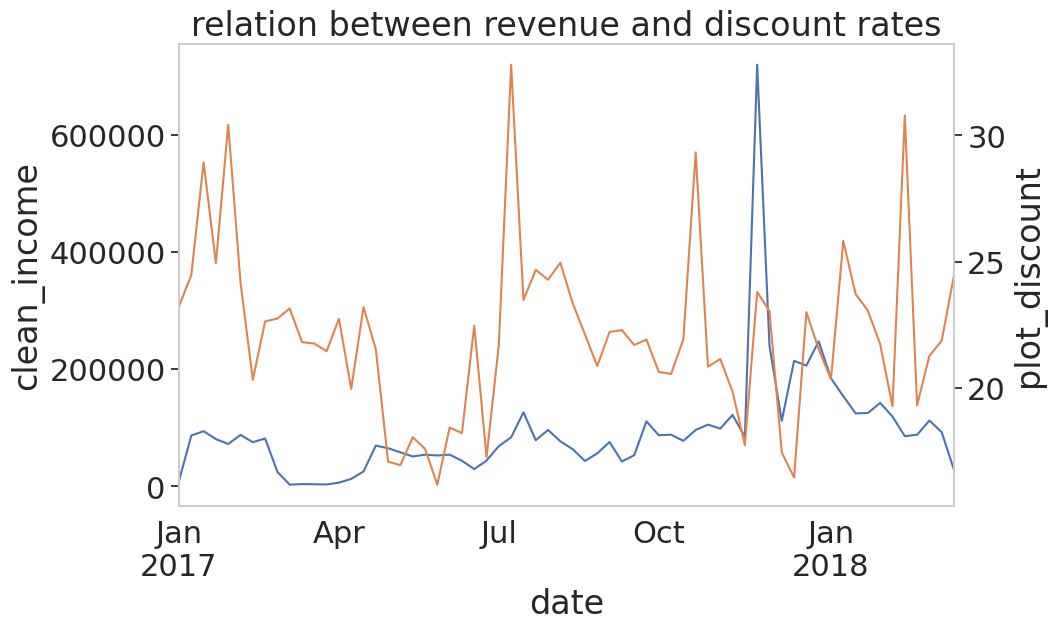

In [ ]:
import matplotlib.pyplot as plt
(
    orderlines_complete
    .resample("W", on="date")
    .sum()["clean_income"]
    .plot(figsize=(10, 6), ylabel = "clean_income")
);
(
    orderlines_complete
    .resample("W", on="date")
    .mean()["plot_discount"]
    .plot(figsize=(10, 6), ylabel = "plot_discount", secondary_y = True, title= 'relation between revenue and discount rates')
);

In [ ]:
# Showing the & of invalid products data as we started the project: before cleaning and controlling the quality of data

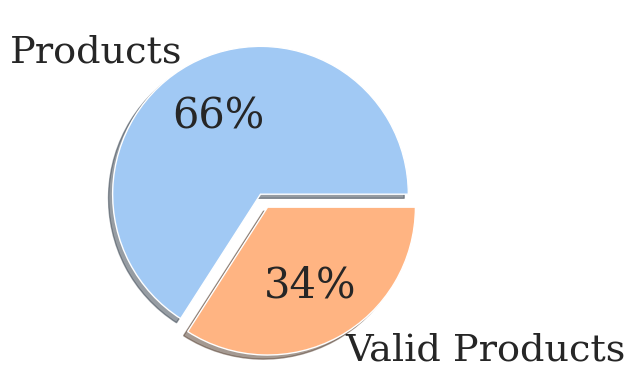

In [ ]:
sns.set_theme(font="arial", font_scale=2.5)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

# declaring data
data = [19326, 9992]
keys = ['Products', 'Valid Products']

# declaring exploding pie
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = colors = sns.color_palette('pastel')[0:2]

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%', shadow=True)

# displaying chart
plt.show()